In [35]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [36]:
def load_data():
    # Implement your data loading logic here
    # Return X and y as numpy arrays
    pass

# Fetch data using yfinance
google = yf.Ticker("GOOG")

In [37]:
df = google.history(period='1d', interval='1m')
print(df.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2023-05-25 09:30:00-04:00  125.209999  125.980003  125.180000  125.699997   
2023-05-25 09:31:00-04:00  125.699997  125.779999  124.877502  125.019997   
2023-05-25 09:32:00-04:00  125.019997  125.434196  124.889999  124.919998   
2023-05-25 09:33:00-04:00  124.949997  125.290001  124.870003  125.099998   
2023-05-25 09:34:00-04:00  125.080002  125.110001  124.769997  125.110001   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2023-05-25 09:30:00-04:00  2210805        0.0           0.0  
2023-05-25 09:31:00-04:00   370352        0.0           0.0  
2023-05-25 09:32:00-04:00   271595        0.0           0.0  
2023-05-25 09:33:00-04:00   203465        0.0           0.0  
2023-05-25 09:34:00-04:00   163335        0.0           0.0  


In [38]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2023-05-25 09:30:00-04:00,125.180000
2023-05-25 09:31:00-04:00,124.877502
2023-05-25 09:32:00-04:00,124.889999
2023-05-25 09:33:00-04:00,124.870003
2023-05-25 09:34:00-04:00,124.769997


In [39]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,125.180000
09:31:00,124.877502
09:32:00,124.889999
09:33:00,124.870003
09:34:00,124.769997


In [40]:
# Split the data into train and test sets
offset = int(0.10 * len(df))
X = np.arange(len(df))
y = df['Low'].values
X_train = X[:-offset]
y_train = y[:-offset]
X_test = X[-offset:]
y_test = y[-offset:]

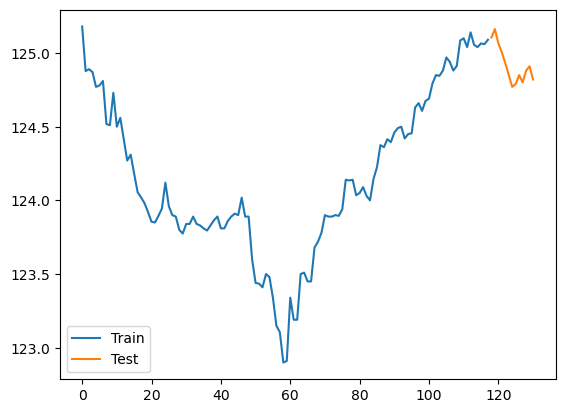

In [41]:
#  Plot the data
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.legend()
plt.show()

In [42]:
# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train.reshape(-1, 1), y_train)

# Evaluate the model
score = model.score(X_test.reshape(-1, 1), y_test)
print("Model score:", score)

Model score: -12.711091014426144


In [43]:
#  Print data for analysis
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')

# Predict for time 1
forecast = model.predict(X_test.reshape(-1, 1))[0]
print(f'Pred data for time 1: {forecast}')


Real data for time 0: 125.08999633789062
Real data for time 1: 125.1050033569336
Pred data for time 1: 124.45426472079906
